In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn

# from random import seed
# seed(1)


# kaggle = 1 # Kaggle active 1

# if kaggle == 1 :
#     MNIST_PATH= '../input/digit-recognizer'
# else:
#     MNIST_PATH= '../Another_MNIST_try/data/input/digit-recognizer'



# %matplotlib inline

# import os
# for dirname, _, filenames in os.walk(MNIST_PATH): 
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [4]:


train_copy = train.copy()

# separating labels from features
mnist_features = train_copy.drop('label', axis=1)
mnist_labels = train_copy['label']



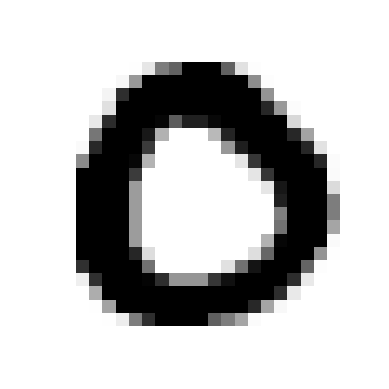

In [5]:
plt.imshow(np.asfarray(mnist_features[4:5]).reshape(28,28), cmap='binary')
plt.axis("off")
plt.show()

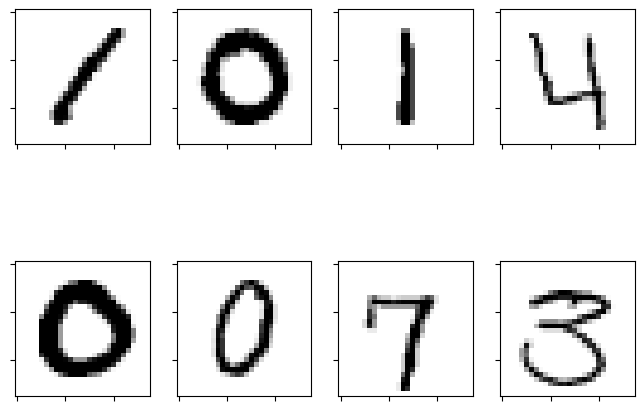

In [6]:
def print_digits(digit_dataframe):
    figsize = (8,6)
    cols = 4
    rows = 6 // cols +1 

    def trim_axs(axs, N):
        """
        Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
        """
        axs = axs.flat
        for ax in axs[N:]:
            ax.remove()
        return axs[:N]


    axs = plt.figure(figsize=figsize).subplots(rows, cols)
    axs = trim_axs(axs, len(digit_dataframe))

    i = 0

    for ax in axs:
        ax.imshow((np.asfarray(digit_dataframe.iloc[i]).reshape(28,28)),cmap='binary')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        i = i + 1

print_digits(mnist_features)



In [7]:
corr_matrix = train_copy.corr()

corr_matrix
# corr_matrix['label'].sort_values(ascending=False)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033424,0.025050,0.019558,0.014490,0.009790,0.006075,NaN,NaN,NaN,NaN
pixel0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel779,0.006075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000240,-0.000174,-0.000124,0.236633,0.905835,1.000000,NaN,NaN,NaN,NaN
pixel780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
corr_matrix['label'].sort_values(ascending=False)

label       1.000000
pixel381    0.431506
pixel409    0.423767
pixel436    0.420922
pixel408    0.413855
              ...   
pixel760         NaN
pixel780         NaN
pixel781         NaN
pixel782         NaN
pixel783         NaN
Name: label, Length: 785, dtype: float64

array([[<AxesSubplot:xlabel='pixel381', ylabel='pixel381'>,
        <AxesSubplot:xlabel='pixel409', ylabel='pixel381'>,
        <AxesSubplot:xlabel='pixel436', ylabel='pixel381'>,
        <AxesSubplot:xlabel='pixel408', ylabel='pixel381'>],
       [<AxesSubplot:xlabel='pixel381', ylabel='pixel409'>,
        <AxesSubplot:xlabel='pixel409', ylabel='pixel409'>,
        <AxesSubplot:xlabel='pixel436', ylabel='pixel409'>,
        <AxesSubplot:xlabel='pixel408', ylabel='pixel409'>],
       [<AxesSubplot:xlabel='pixel381', ylabel='pixel436'>,
        <AxesSubplot:xlabel='pixel409', ylabel='pixel436'>,
        <AxesSubplot:xlabel='pixel436', ylabel='pixel436'>,
        <AxesSubplot:xlabel='pixel408', ylabel='pixel436'>],
       [<AxesSubplot:xlabel='pixel381', ylabel='pixel408'>,
        <AxesSubplot:xlabel='pixel409', ylabel='pixel408'>,
        <AxesSubplot:xlabel='pixel436', ylabel='pixel408'>,
        <AxesSubplot:xlabel='pixel408', ylabel='pixel408'>]], dtype=object)

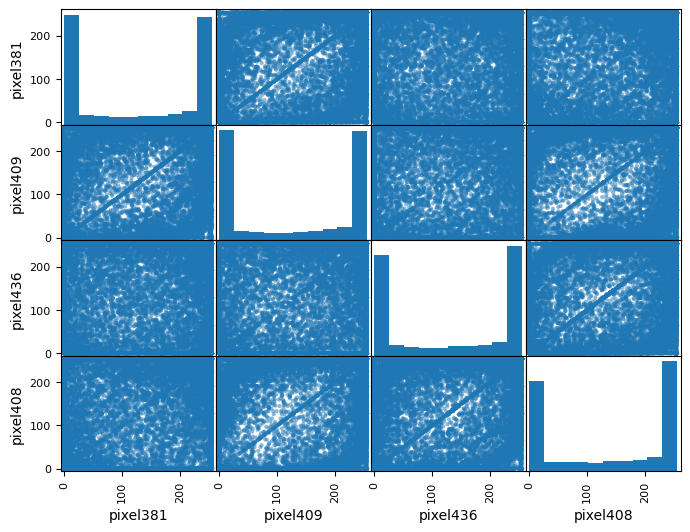

In [9]:


attributes = ['pixel381','pixel409','pixel436','pixel408']

pd.plotting.scatter_matrix(train_copy[attributes], figsize=(8,6))



In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Pipeline for transforming / scaling the data in various ways
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [11]:
mnist_features_prepared = num_pipeline.fit_transform(mnist_features)
mnist_features_prepared

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Choose a model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Train classifier with prepared train set
kneighbors = KNeighborsClassifier()
kneighbors.fit(mnist_features_prepared, mnist_labels)

KNeighborsClassifier()

In [14]:
some_digits = mnist_features[:8]
some_digits_labels = mnist_labels[:8]

some_digits_prepared = num_pipeline.transform(some_digits)

# Test the new classifier
print("Following were predicted: ", kneighbors.predict(some_digits_prepared))
print("The labels: ", list(some_digits_labels))



Following were predicted:  [1 0 1 4 0 0 7 3]
The labels:  [1, 0, 1, 4, 0, 0, 7, 3]


C:\Users\Galaxy Tab\anaconda4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


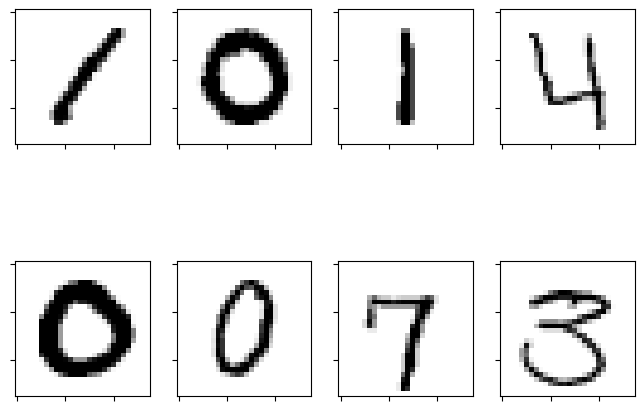

In [15]:
print_digits(some_digits)

In [16]:
corr_matrix['label'].sort_values(ascending=False)

label       1.000000
pixel381    0.431506
pixel409    0.423767
pixel436    0.420922
pixel408    0.413855
              ...   
pixel760         NaN
pixel780         NaN
pixel781         NaN
pixel782         NaN
pixel783         NaN
Name: label, Length: 785, dtype: float64

In [17]:
from sklearn.model_selection import cross_val_predict

mnist_label_preds = cross_val_predict(KNeighborsClassifier(), mnist_features_prepared, mnist_labels, cv=3, n_jobs=-1)

In [18]:
print("Cross Val Predict results: " , mnist_label_preds)

Cross Val Predict results:  [1 0 1 ... 7 6 9]


<AxesSubplot:>

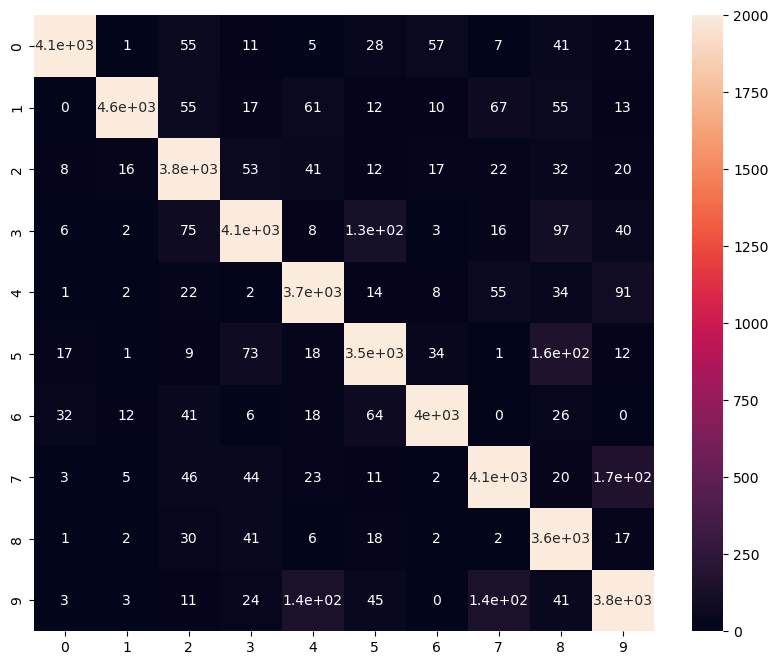

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(mnist_label_preds, mnist_labels)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, vmin=0, vmax=2000)

<AxesSubplot:>

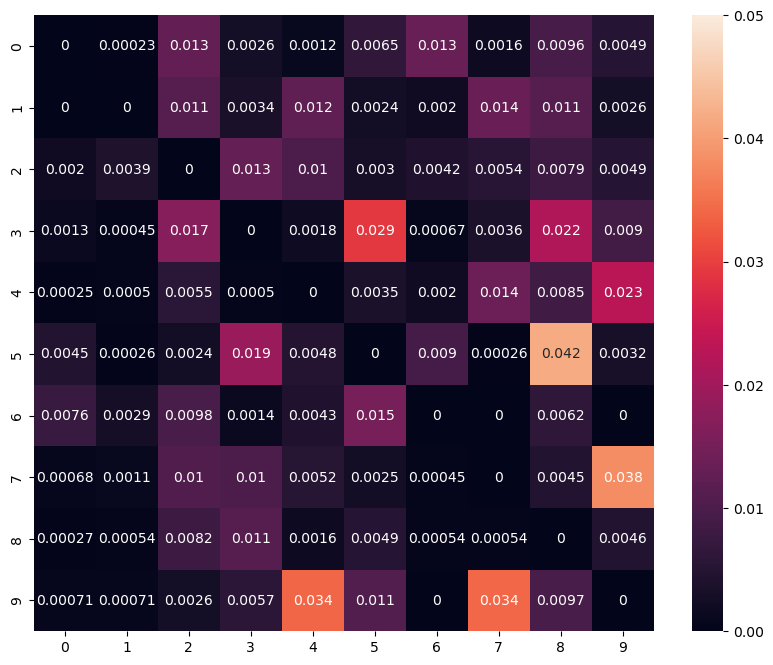

In [20]:
row_sums=cm.sum(axis=1,keepdims=True)
norm_conf_mx=cm/row_sums #normalized confusion matrix

np.fill_diagonal(norm_conf_mx,0)

plt.figure(figsize=(10,8))
sn.heatmap(norm_conf_mx, annot=True, vmin=0, vmax=0.05)

<AxesSubplot:>

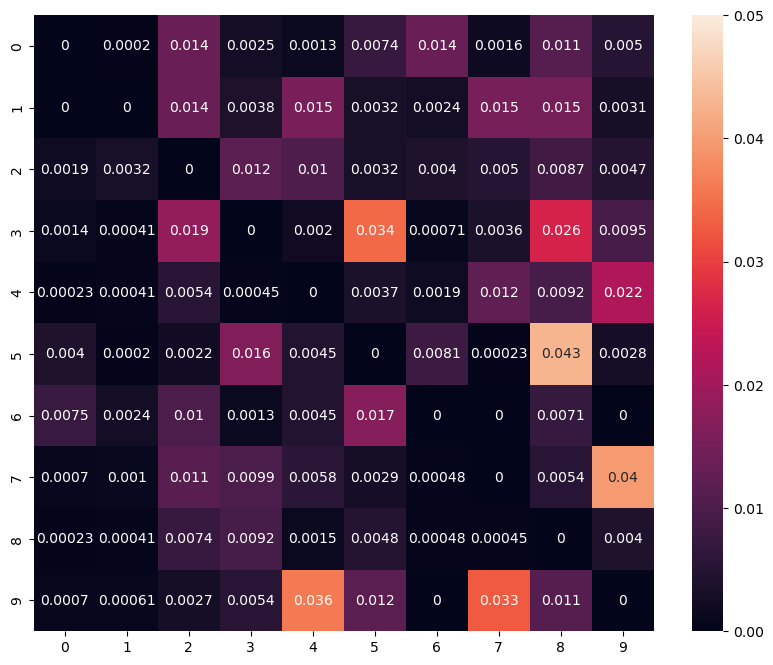

In [21]:
row_sums1=cm.sum(axis=1,keepdims=False)
norm_conf_mx1=cm/row_sums1 #normalized confusion matrix

np.fill_diagonal(norm_conf_mx1,0)

plt.figure(figsize=(10,8))
sn.heatmap(norm_conf_mx1, annot=True, vmin=0, vmax=0.05)

In [22]:
# some_digits = mnist_features[:8]
# some_digits_labels = mnist_labels[:8]

# some_digits_prepared = num_pipeline.transform(some_digits)

# # Test the new classifier
# print("Following were predicted: ", kneighbors.predict(some_digits_prepared))
# print("The labels: ", list(some_digits_labels))



In [23]:
# print_digits(some_digits)

In [24]:
# from sklearn.model_selection import cross_val_predict

In [25]:
# mnist_label_preds=cross_val_predict(KNeighborsClassifier(),mnist_features_prepared,mnist_labels,cv=3,n_jobs=-1)

In [26]:
# print("Cross Val Predict results: " , mnist_label_preds)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision: ",precision_score(mnist_labels, mnist_label_preds, average='weighted'))
print("Recall: ",recall_score(mnist_labels, mnist_label_preds, average='weighted'))
print("F1-Score (weighted): ", f1_score(mnist_labels, mnist_label_preds, average='weighted'))

Precision:  0.9355462973347057
Recall:  0.9352380952380952
F1-Score (weighted):  0.9350145194546713


In [28]:
minst_9_labels_idx = mnist_labels[mnist_labels == 9].index
print(minst_9_labels_idx)
# mnist_9_features = mnist_features.iloc[minst_9_labels_idx]


Int64Index([   11,    27,    28,    31,    33,    40,    53,    58,    71,
               83,
            ...
            41901, 41914, 41944, 41946, 41959, 41962, 41969, 41975, 41992,
            41999],
           dtype='int64', length=4188)


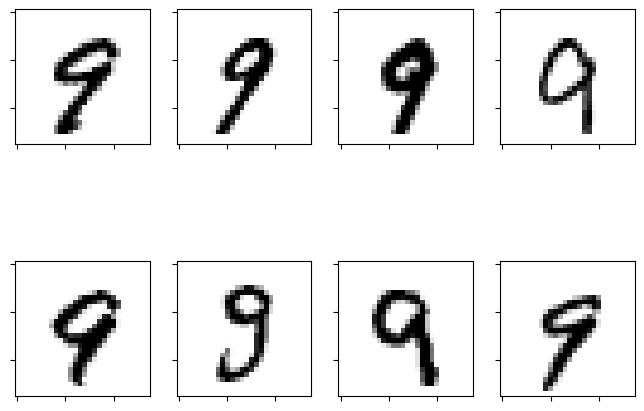

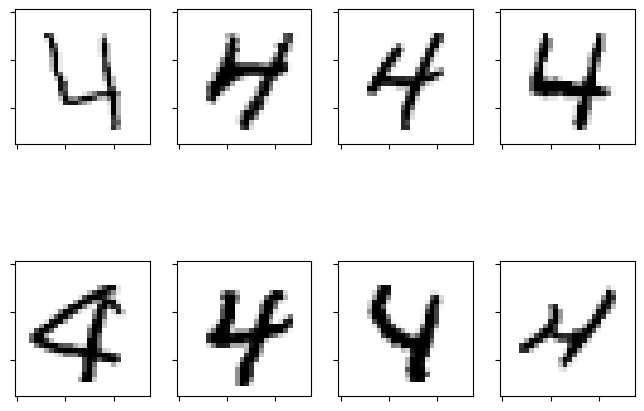

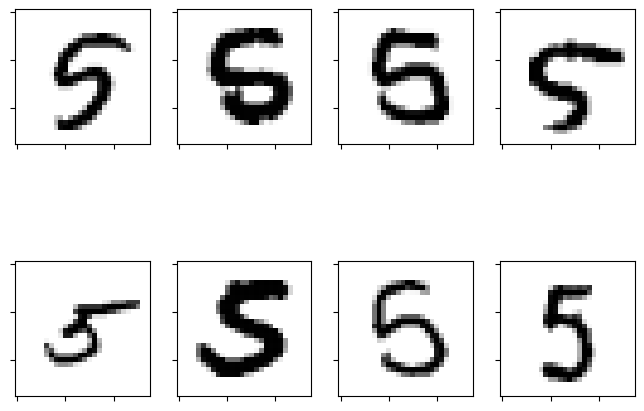

In [29]:
# show digits for 9 and 4 
minst_9_labels_idx = mnist_labels[mnist_labels == 9].index
mnist_9_features = mnist_features.iloc[minst_9_labels_idx]

minst_4_labels_idx = mnist_labels[mnist_labels == 4].index
mnist_4_features = mnist_features.iloc[minst_4_labels_idx]

minst_5_labels_idx = mnist_labels[mnist_labels == 5].index
mnist_5_features = mnist_features.iloc[minst_5_labels_idx]

print_digits(mnist_9_features)
print_digits(mnist_4_features)
print_digits(mnist_5_features)

In [30]:
some_digits = mnist_features[:8]
some_digits_labels = mnist_labels[:8]

some_digits_prepared = num_pipeline.transform(some_digits)

# Test the new classifier
print("Following were predicted: ", kneighbors.predict(some_digits_prepared))
print("The labels: ", list(some_digits_labels))


Following were predicted:  [1 0 1 4 0 0 7 3]
The labels:  [1, 0, 1, 4, 0, 0, 7, 3]


C:\Users\Galaxy Tab\anaconda4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
some_digits_labels

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
Name: label, dtype: int64

In [32]:
#Simple

In [33]:
import warnings
warnings.filterwarnings('ignore')

# knn_final = KNeighborsClassifier()
# knn_final = KNeighborsClassifier(n_neighbors=4,weights='distance',p=1, n_jobs=-1)
# knn_final.fit(mnist_features_prepared, mnist_labels)
# KNeighborsClassifier(n_jobs=-1, n_neighbors=4, p=1, weights='distance')
test_copy = test.copy()

test_prep = num_pipeline.transform(test_copy) # Transform data for kneighbors


mnist_submission = pd.DataFrame(columns=['ImageId','Label'])
test_prep_df = pd.DataFrame(data=test_prep)
# fill submission file
i=0
for row in test_prep:
    i = i+1
    index = i
    label = kneighbors.predict(row.reshape(1,-1))
    
    mnist_submission = mnist_submission.append({'ImageId' : index , 'Label': label} , ignore_index=True)
    pass
# Preparing the submission file
mnist_submission.ImageId = mnist_submission.ImageId.astype(int)
mnist_submission.Label = mnist_submission.Label.astype(int)
mnist_submission.to_csv("mnist_submission.csv",index=False)


In [34]:
# k_list = list(range(1,61))
#Evaluer le meilleur k (neighbors je crois)
k_list=list(range(1,10))
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

k_values = dict(n_neighbors=k_list)
grid = GridSearchCV(KNeighborsClassifier() , k_values, cv=6, scoring='accuracy')
# grid.fit(mnist_features, mnist_labels)


In [35]:
grid.fit(mnist_features, mnist_labels)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [36]:
grid.best_estimator_


KNeighborsClassifier(n_neighbors=3)

In [37]:
grid.best_params_

{'n_neighbors': 3}

In [38]:
#2e méthode ; méthode mienne avec les paramètres et le n_neighbors optimal

# 
# model=KNeighborsClassifier(n_neighbors=4,weights='distance',p=1, n_jobs=-1)

# model.fit(X_train,y_train)

# y_pred=model.predict(X_test)

# accuracy=model.score(X_train,y_train)
# X_test = test_copy
# y_test = test_copy['label']


# mnist_submission2 = pd.DataFrame({'ImageId': X_test, 'Label': y_test})

# mnist_submission2.to_csv("mnist_submission_v2.csv",index=False)

#Tester avec ça et comparer à la submission

In [39]:
#3e méthode : regression logistique?
# from sklearn.model_selection import train_test_split
# X_train,X_val,y_train,y_val=train_test_split(mnist_features_prepared,mnist_labels,test_size=0.2,random_state=42)
#grid.fit(np.concatenate([X_train,X_val]), np.concatenate([y_train,y_val]))

In [40]:
grid.best_estimator_
grid.best_params_

{'n_neighbors': 3}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Avec le n_neighbors mis en valeur et voir la différence
knn_final = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1, n_jobs=-1)
knn_final.fit(mnist_features_prepared, mnist_labels)
# KNeighborsClassifier(n_jobs=-1, n_neighbors=4, p=1, weights='distance')
test_copy = test.copy()

test_prep = num_pipeline.transform(test_copy) # Transform data for kneighbors


mnist_submission = pd.DataFrame(columns=['ImageId','Label'])
test_prep_df = pd.DataFrame(data=test_prep)
# fill submission file
i=0
for row in test_prep:
    i = i+1
    index = i
    label = knn_final.predict(row.reshape(1,-1))
    
    mnist_submission = mnist_submission.append({'ImageId' : index , 'Label': label} , ignore_index=True)
    pass
# Preparing the submission file
mnist_submission.ImageId = mnist_submission.ImageId.astype(int)
mnist_submission.Label = mnist_submission.Label.astype(int)
mnist_submission.to_csv("mnist_submission1.csv",index=False)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

prep_pipeline=Pipeline([('kmeans',KMeans()),('kneighbors',KNeighborsClassifier)])

In [ ]:
KMeans().get_params().keys()

In [ ]:
k_range=list(20,500,20)
k_list=list()

for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans=kmeans.fit(mnist_features_prepared)
    
    k_list.append(kmeans)
    


In [ ]:
inertias_list=[]
for model in k_list:
    inertias_list.append([model.inertia_])


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias_list, "bo-")
plt.title("Inertia for the Amount of Clusters")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia in M.", fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil_list=list()

for model in k_list:
    sil_score=silhouette_score(mnist_features_prepared,model.labels_)
    
    sil_list.append(sil_score)
    
    


In [ ]:
best_index=np.argmax(sil_list)
best_k=k_list[best_index]
best_score=sil_list[best_index]



In [ ]:
print(best_score)
print(best_k)

In [ ]:
##%%time
from sklearn.model_selection import GridSearchCV

param_grid_try_1 =[
  { 
    'n_neighbors':[1,2,3,4],
    'weights':['distance','uniform'],
    'p':[1]
  },
  { 
    'n_neighbors':[4,5,6],
    'weights':['distance'],
    'p':[1]
  },
   {
    'n_neighbors':[4],
    'leaf_size': [200,300,400],
    'weights':['distance'],
    'p':[1]
  }
]


param_grid_try_2 = dict(
   kmeans__n_clusters= [400,500],
   kneighbors__n_neighbors=[4,5,6,10,15,20],
   kneighbors__weights=['distance'],
   kneighbors__p=[1]
)

param_grid_try_3 = dict(
   kmeans__n_clusters=[400,500,600],
   kneighbors__n_neighbors=[2,3,4,5],
   kneighbors__weights=['distance'],
   kneighbors__p=[1]
)

param_grid_try_4 = dict(
   kmeans__n_clusters= [200,300,350,400,500],
   kneighbors__n_neighbors=[4],
   kneighbors__weights=['distance'],
   kneighbors__p=[2]  
)

param_grid_try_5 = dict(
   kmeans__n_clusters= [5000],
   kneighbors__n_neighbors=[4],
   kneighbors__weights=['distance']
)

## one with kmeans__n_clusters param for showcase
param_grid = dict(
   kmeans__n_clusters=[50],
   kneighbors__n_neighbors=[4],
   kneighbors__weights=['distance'],
   kneighbors__p=[1]  
)
#Essayer avec un autre param_grids
grid_search = GridSearchCV(prep_pipeline, param_grid, cv=3, n_jobs=1, return_train_score=True, verbose=2)
grid_search.fit(mnist_features_prepared, mnist_labels)

In [ ]:
print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
cvres=grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score,params)
    

In [ ]:
fig = plt.figure(figsize=(8,12)) 
ax = fig.add_subplot(2,1,1) 
ax.plot(list(range(1,len(cvres['mean_train_score']) + 1)), cvres['mean_train_score']) 
ax.plot(list(range(1,len(cvres['mean_test_score']) + 1)), cvres['mean_test_score']) 

In [ ]:
#3e méthode avec ce qui a été fait par Internet
import warnings
warnings.filterwarnings('ignore')

knn_final = KNeighborsClassifier()
knn_final = KNeighborsClassifier(n_neighbors=4,weights='distance',p=1, n_jobs=-1)
knn_final.fit(mnist_features_prepared, mnist_labels)
# KNeighborsClassifier(n_jobs=-1, n_neighbors=4, p=1, weights='distance')
test_copy = test.copy()

test_prep = num_pipeline.transform(test_copy) # Transform data for kneighbors


mnist_submission = pd.DataFrame(columns=['ImageId','Label'])
test_prep_df = pd.DataFrame(data=test_prep)
# fill submission file
i=0
for row in test_prep:
    i = i+1
    index = i
    label = knn_final.predict(row.reshape(1,-1))
    
    mnist_submission = mnist_submission.append({'ImageId' : index , 'Label': label} , ignore_index=True)
    pass
# Preparing the submission file
mnist_submission.ImageId = mnist_submission.ImageId.astype(int)
mnist_submission.Label = mnist_submission.Label.astype(int)
mnist_submission.to_csv("mnist_submission2.csv",index=False)